In [ ]:
import os
import re
import shutil

# データが入っているルートディレクトリ
root_dir = r'D:\\FY2025\\Fukuyama\\work place\\eeg-mri-aging-analysis\\data\\EEG_MPILMBB_LEMON\\EEG_Raw_BIDS_ID'

# 各被験者フォルダ（sub-xxxxx）
subject_dirs = [d for d in os.listdir(root_dir) if d.startswith('sub-')]

for subject in subject_dirs[1:]:
    base_dir = os.path.join(root_dir, subject)
    rseeg_path = os.path.join(base_dir, 'RSEEG')
    if not os.path.exists(rseeg_path):
        continue

    # .vhdrファイルを探す（1個限定）
    vhdr_list = [f for f in os.listdir(rseeg_path) if f.endswith('.vhdr')]
    if len(vhdr_list) != 1:
        print(f"Skipping {subject}: unexpected number of .vhdr files")
        continue

    vhdr_path = os.path.join(rseeg_path, vhdr_list[0])
    old_match = re.match(r"(sub-\d+)", vhdr_list[0])
    old_basename = old_match.group(1)

    # vhdrファイルの中から DataFile の行を読み取り、そこから被験者IDを取得
    with open(vhdr_path, 'r', encoding='utf-8', errors='ignore') as f:
        for line in f:
            if line.startswith('DataFile='):
                eeg_filename = line.strip().split('=')[1]
                break
        else:
            print(f"No DataFile= line found in {vhdr_path}, skipping.")
            continue

    new_match = re.match(r"(sub-\d+)", eeg_filename)
    if not new_match:
        print(f"Could not extract subject ID from {eeg_filename}")
        continue
    new_basename = new_match.group(1)

    new_dir = os.path.join(root_dir, new_basename, 'RSEEG')

    # 新ディレクトリを作成（すでに存在してもOK）
    os.makedirs(new_dir, exist_ok=True)

    # 拡張子リスト
    extensions = ['.vhdr', '.vmrk', '.eeg']

    # 各ファイルを移動して名前変更
    for ext in extensions:
        old_file = os.path.join(rseeg_path, f"{old_basename}{ext}")
        new_file = os.path.join(new_dir, f"{new_basename}{ext}")
        
        if os.path.exists(old_file):
            print(f"移動: {old_file} → {new_file}")
            shutil.move(old_file, new_file)
        else:
            print(f"警告: {old_file} が存在しません")

    # 旧ディレクトリ削除（空でなくても強制的に削除）
    if os.path.exists(base_dir):
        print(f"\n旧ディレクトリを削除します: {base_dir}")
        shutil.rmtree(base_dir)
    else:
        print(f"\n旧ディレクトリが見つかりませんでした: {base_dir}")

移動: D:\\FY2025\\Fukuyama\\work place\\eeg-mri-aging-analysis\\data\\EEG_MPILMBB_LEMON\\EEG_Raw_BIDS_ID\sub-032302\RSEEG\sub-032302.vhdr → D:\\FY2025\\Fukuyama\\work place\\eeg-mri-aging-analysis\\data\\EEG_MPILMBB_LEMON\\EEG_Raw_BIDS_ID\sub-010003\RSEEG\sub-010003.vhdr
移動: D:\\FY2025\\Fukuyama\\work place\\eeg-mri-aging-analysis\\data\\EEG_MPILMBB_LEMON\\EEG_Raw_BIDS_ID\sub-032302\RSEEG\sub-032302.vmrk → D:\\FY2025\\Fukuyama\\work place\\eeg-mri-aging-analysis\\data\\EEG_MPILMBB_LEMON\\EEG_Raw_BIDS_ID\sub-010003\RSEEG\sub-010003.vmrk
移動: D:\\FY2025\\Fukuyama\\work place\\eeg-mri-aging-analysis\\data\\EEG_MPILMBB_LEMON\\EEG_Raw_BIDS_ID\sub-032302\RSEEG\sub-032302.eeg → D:\\FY2025\\Fukuyama\\work place\\eeg-mri-aging-analysis\\data\\EEG_MPILMBB_LEMON\\EEG_Raw_BIDS_ID\sub-010003\RSEEG\sub-010003.eeg

旧ディレクトリを削除します: D:\\FY2025\\Fukuyama\\work place\\eeg-mri-aging-analysis\\data\\EEG_MPILMBB_LEMON\\EEG_Raw_BIDS_ID\sub-032302
移動: D:\\FY2025\\Fukuyama\\work place\\eeg-mri-aging-analysis\\data

In [2]:
import os
import numpy as np
import mne


In [3]:
raw_ec = mne.io.read_raw_eeglab('D:\\FY2025\\Fukuyama\\work place\\preprocessed_data\\sub-010002_EC.set')
raw_eo = mne.io.read_raw_eeglab('D:\\FY2025\\Fukuyama\\work place\\preprocessed_data\\sub-010002_EO.set')

Reading D:\FY2025\Fukuyama\work place\preprocessed_data\sub-010002_EC.fdt
Reading D:\FY2025\Fukuyama\work place\preprocessed_data\sub-010002_EO.fdt


C:\Users\sFukuyama\AppData\Local\Temp\7\ipykernel_34104\2245504916.py:1: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw_ec = mne.io.read_raw_eeglab('D:\\FY2025\\Fukuyama\\work place\\preprocessed_data\\sub-010002_EC.set')
C:\Users\sFukuyama\AppData\Local\Temp\7\ipykernel_34104\2245504916.py:1: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw_ec = mne.io.read_raw_eeglab('D:\\FY2025\\Fukuyama\\work place\\preprocessed_data\\sub-010002_EC.set')
C:\Users\sFukuyama\AppData\Local\Temp\7\ipykernel_34104\2245504916.py:2: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw_eo = mne.io.read_raw_eeglab('D:\\FY2025\\Fukuyama\\work place\\preprocessed_data\\sub-010002_EO.set')
C:\Users\sFukuyama\AppData\Local\Temp\7\ipykernel_34104\2245504916.py:2: RuntimeWarning: The data contains 'boundary' events, indicating data di

In [4]:
duration_eo = raw_eo.times[-1]
duration_ec = raw_ec.times[-1]

print(f"Eyes Open (EO) duration: {duration_eo:.2f} sec")
print(f"Eyes Closed (EC) duration: {duration_ec:.2f} sec")

Eyes Open (EO) duration: 471.44 sec
Eyes Closed (EC) duration: 477.38 sec


In [4]:
print(raw)
print(raw.info)

<RawEEGLAB | sub-010002_EC.fdt, 59 x 119345 (477.4 s), ~70 KiB, data not loaded>
<Info | 8 non-empty values
 bads: []
 ch_names: Fp1, Fp2, F7, F3, Fz, F4, F8, FC5, FC1, FC2, FC6, C3, Cz, C4, ...
 chs: 59 EEG
 custom_ref_applied: False
 dig: 62 items (3 Cardinal, 59 EEG)
 highpass: 0.0 Hz
 lowpass: 125.0 Hz
 meas_date: unspecified
 nchan: 59
 projs: []
 sfreq: 250.0 Hz
>


In [5]:
raw.crop(0, 60)  # 60秒間だけ使用

<RawEEGLAB | sub-010002_EC.fdt, 59 x 15001 (60.0 s), ~70 KiB, data not loaded>

In [7]:
from scipy.fftpack import fft

# 全チャネル・全時点のデータ取得
data = raw.get_data()  # shape = (n_channels, n_times)

# 各チャネルについて FFT を実行
fft_data = fft(data, axis=1)  # チャネル軸で FFT

# 周波数軸を生成
n_times = data.shape[1]
sfreq = raw.info['sfreq']
freqs = np.fft.fftfreq(n_times, d=1/sfreq)

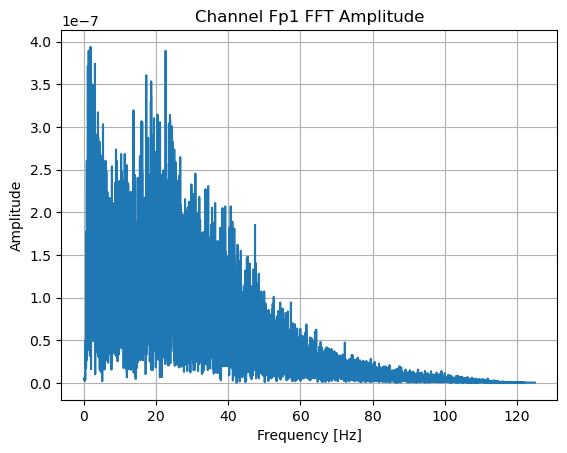

In [8]:
import matplotlib.pyplot as plt

ch = 0  # プロット対象チャネルのインデックス
half = n_times // 2

plt.figure()
plt.plot(freqs[:half], np.abs(fft_data[ch, :half]) * (2/n_times))
plt.title(f"Channel {raw.ch_names[ch]} FFT Amplitude")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()

In [12]:
raw.compute_psd(fmin=1, fmax=40).plot()

AssertionError: 

In [10]:
# PSDの計算（Welch法）
psds, freqs = mne.time_frequency.psd_welch(
    raw,
    fmin=1, fmax=40,  # 周波数範囲
    n_fft=2048,       # FFTサイズ
    n_overlap=1024,
    n_per_seg=2048,
    average='mean'
)

AttributeError: No mne.time_frequency attribute psd_welch

In [11]:
ch_idx = 0
plt.plot(freqs, psds[ch_idx], label=raw.ch_names[ch_idx])
plt.xlabel('Frequency (Hz)')
plt.ylabel('PSD (Power / Hz)')
plt.title('Power Spectral Density')
plt.grid(True)
plt.legend()
plt.show()

NameError: name 'psds' is not defined

In [ ]:
import mne
import numpy as np
import matplotlib.pyplot as plt

# ===== 1. ファイルの読み込み =====
# 1. ファイル名を指定（.vhdrファイルのみ）
raw1 = mne.io.read_raw_brainvision('D:\\FY2025\\Fukuyama\\work place\\raw_data\\sub-010002\\RSEEG\\sub-010002.vhdr')
#raw1 = mne.io.read_raw_fif('raw_data.fif', preload=True)         # 生データ
raw2 = mne.io.read_raw_eeglab('D:\\FY2025\\Fukuyama\\work place\\preprocessed_data\\sub-010002_EC.set')  # 前処理済

# ===== 2. 任意：最初の10秒だけに切り取る（表示を軽く）=====
#raw1.crop(tmin=0, tmax=10)
#raw2.crop(tmin=0, tmax=10)

# ===== 3. 生データの波形を表示 =====
raw1.plot(n_channels=len(raw1.ch_names), scalings='auto', title='Raw EEG')

# ===== 4. 前処理後データの波形を表示 =====
raw2.plot(n_channels=len(raw2.ch_names), scalings='auto', title='Preprocessed EEG')

Extracting parameters from D:\FY2025\Fukuyama\work place\raw_data\sub-010002\RSEEG\sub-010002.vhdr...
Setting channel info structure...
Reading D:\FY2025\Fukuyama\work place\preprocessed_data\sub-010002_EC.fdt


C:\Users\sFukuyama\AppData\Local\Temp\7\ipykernel_30648\2596970648.py:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw2 = mne.io.read_raw_eeglab('D:\\FY2025\\Fukuyama\\work place\\preprocessed_data\\sub-010002_EC.set')  # 前処理済
C:\Users\sFukuyama\AppData\Local\Temp\7\ipykernel_30648\2596970648.py:9: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw2 = mne.io.read_raw_eeglab('D:\\FY2025\\Fukuyama\\work place\\preprocessed_data\\sub-010002_EC.set')  # 前処理済


Channels marked as bad:
none
Channels marked as bad:
none
